<a href="https://colab.research.google.com/github/Pari2324/CYBER_SECURITY_THREAT_DETECTION_BY_AI/blob/main/Cyber_Security_Threat_Detection_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [73]:
import pandas as pd
import numpy as np


# Dataset URL
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"

# assigning coloumns name
cols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
        "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
        "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
        "num_shells","num_access_files","num_outbound_cmds","is_host_login",
        "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
        "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
        "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
        "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
        "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
        "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# read the data
data = pd.read_csv(url, names=cols)

# Show top 5 rows
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [74]:
# Step 4: Drop 'label' and optionally 'difficulty' if it exists
columns_to_drop = ["label"]

# Check if 'difficulty' column exists, then add it to drop list
if "difficulty" in data.columns:
    columns_to_drop.append("difficulty")

# Drop relevant columns to create X and y
X = data.drop(columns=columns_to_drop, axis=1)
y = data["label"]

# Check shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (125973, 41)
Shape of y: (125973,)


In [75]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of original X to keep safe
X_encoded = X.copy()

# Columns that need encoding
categorical_cols = ["protocol_type", "service", "flag"]

# Create label encoder object
le = LabelEncoder()

# Encode each column
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Show top 5 rows of new encoded data
X_encoded.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,tcp,20,9,482,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
0,udp,44,9,143,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
0,tcp,49,5,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
0,tcp,24,9,229,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
0,tcp,24,9,196,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ✅ Step 6.1: Make a copy of X to safely encode
X_encoded = X.copy()

# ✅ Step 6.2: Encode all categorical columns
label_enc = LabelEncoder()

# Known categorical columns
categorical_cols = ["protocol_type", "service", "flag"]

for col in categorical_cols:
    X_encoded[col] = label_enc.fit_transform(X_encoded[col])

# ✅ Step 6.3: Find any leftover 'object' type columns (surprise ones!)
leftover = X_encoded.dtypes[X_encoded.dtypes == 'object'].index.tolist()

# Encode those too
for col in leftover:
    X_encoded[col] = label_enc.fit_transform(X_encoded[col])

# ✅ Step 6.4: Encode output labels (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# ✅ Step 6.5: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# ✅ Step 6.6: Confirm all numeric (final check)
print("Any non-numeric columns?", X_encoded.dtypes[X_encoded.dtypes == "object"])
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)




Any non-numeric columns? Series([], dtype: object)
X_train shape: (100778, 41)
y_train shape: (100778,)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 7.1: Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7.2: Train the model
model.fit(X_train, y_train)

# Step 7.3: Predict on test data
y_pred = model.predict(X_test)

# Step 7.4: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")

print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Accuracy: 90.3 %

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.65      0.73      0.69        15
           2       0.67      0.40      0.50        10
           3       0.54      0.50      0.52        14
           4       0.57      0.38      0.46        21
           5       0.44      0.39      0.41        18
           6       0.38      0.47      0.42        19
           7       0.50      0.35      0.41        26
           8       0.50      0.31      0.38        26
           9       0.55      0.60      0.57        30
          10       0.61      0.59      0.60        56
          11       0.78      0.77      0.77       146
          12       0.72      0.71      0.72       143
          13       0.50      0.46      0.48        85
          14       0.72      0.67      0.69       149
          15       0.86      0.89      0.87       795
          16       0.77      

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


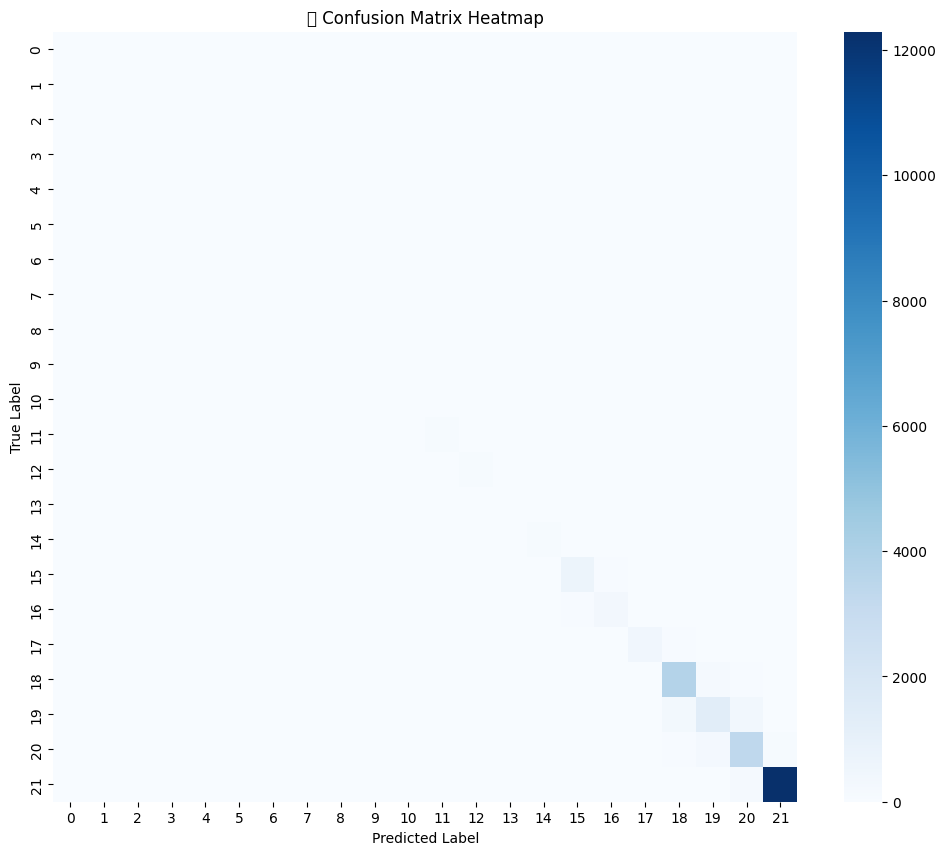

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127856 (\N{SHORTCAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


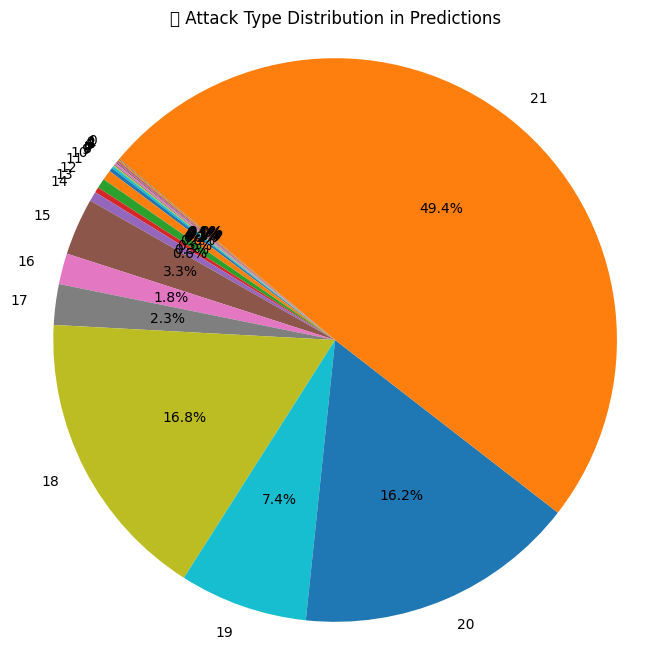

🗂️ Label Mapping:
 {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21)}


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Recalculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#  2. Pie Chart of Predicted Labels
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(8,8))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=140)
plt.title("🍰 Attack Type Distribution in Predictions")
plt.axis('equal')
plt.show()

#  3. Label Mapping (Number to Name)
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("🗂️ Label Mapping:\n", label_mapping)
